In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [3]:
# Import a dataset from a csv file
df = pd.read_csv('../data/raw/ACME-HappinessSurvey2020.csv')

In [4]:
import sys
# add src folder of functions to PATH
if 'C:/Users/cltur/Desktop/Apziva/customer_happiness/src' not in sys.path:
    sys.path.append('C:/Users/cltur/Desktop/Apziva/customer_happiness/src')

In [ ]:
# Results from lazy predict showing 3 best models for a likely feature combinations
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| Feature Combination   | Mentioned In                                                                                                                 | Model                       |   Accuracy |   F1 Score |
#+=======================+==============================================================================================================================+=============================+============+============+
#| X1, X5                | Logistic Regression, SVC, GradientBoostingClassifier, RidgeClassifier, SGDClassifier, RFE Summary, KDE Analysis, Violin Plot | DecisionTreeClassifier      |   0.807692 |   0.806827 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5                | Logistic Regression, SVC, GradientBoostingClassifier, RidgeClassifier, SGDClassifier, RFE Summary, KDE Analysis, Violin Plot | ExtraTreeClassifier         |   0.807692 |   0.806827 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5                | Logistic Regression, SVC, GradientBoostingClassifier, RidgeClassifier, SGDClassifier, RFE Summary, KDE Analysis, Violin Plot | ExtraTreesClassifier        |   0.807692 |   0.806827 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X3                | Random Forest Multivariate Analysis, RFE, KDE Analysis, Violin Plot                                                          | LinearSVC                   |   0.653846 |   0.634523 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X3                | Random Forest Multivariate Analysis, RFE, KDE Analysis, Violin Plot                                                          | LinearDiscriminantAnalysis  |   0.653846 |   0.634523 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X3                | Random Forest Multivariate Analysis, RFE, KDE Analysis, Violin Plot                                                          | BernoulliNB                 |   0.653846 |   0.634523 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2                | RandomForestClassifier, DecisionTreeClassifier, ExtraTreesClassifier                                                         | PassiveAggressiveClassifier |   0.653846 |   0.617195 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2                | RandomForestClassifier, DecisionTreeClassifier, ExtraTreesClassifier                                                         | NuSVC                       |   0.615385 |   0.615385 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2                | RandomForestClassifier, DecisionTreeClassifier, ExtraTreesClassifier                                                         | DecisionTreeClassifier      |   0.615385 |   0.610723 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X3                | Logistic Regression, KDE Analysis, Violin Plot                                                                               | AdaBoostClassifier          |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X3                | Logistic Regression, KDE Analysis, Violin Plot                                                                               | NuSVC                       |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X3                | Logistic Regression, KDE Analysis, Violin Plot                                                                               | LGBMClassifier              |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5                | Lasso, AdaBoostClassifier                                                                                                    | KNeighborsClassifier        |   0.807692 |   0.796957 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5                | Lasso, AdaBoostClassifier                                                                                                    | NuSVC                       |   0.730769 |   0.724566 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5                | Lasso, AdaBoostClassifier                                                                                                    | BaggingClassifier           |   0.730769 |   0.702262 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X6                | AdaBoostClassifier                                                                                                           | AdaBoostClassifier          |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X6                | AdaBoostClassifier                                                                                                           | CalibratedClassifierCV      |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X6                | AdaBoostClassifier                                                                                                           | SVC                         |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X4                | SVC                                                                                                                          | AdaBoostClassifier          |   0.615385 |   0.600962 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X4                | SVC                                                                                                                          | BernoulliNB                 |   0.615385 |   0.600962 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X4                | SVC                                                                                                                          | NearestCentroid             |   0.615385 |   0.600962 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3            | Logistic Regression, Random Forest, RFE Summary, RidgeClassifier, GradientBoostingClassifier                                 | LGBMClassifier              |   0.730769 |   0.731168 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3            | Logistic Regression, Random Forest, RFE Summary, RidgeClassifier, GradientBoostingClassifier                                 | LabelPropagation            |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3            | Logistic Regression, Random Forest, RFE Summary, RidgeClassifier, GradientBoostingClassifier                                 | AdaBoostClassifier          |   0.730769 |   0.71574  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3            | RFE Summary, RandomForestClassifier, DecisionTreeClassifier                                                                  | SGDClassifier               |   0.653846 |   0.64587  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3            | RFE Summary, RandomForestClassifier, DecisionTreeClassifier                                                                  | Perceptron                  |   0.615385 |   0.610723 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3            | RFE Summary, RandomForestClassifier, DecisionTreeClassifier                                                                  | LGBMClassifier              |   0.615385 |   0.600962 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2            | ExtraTreesClassifier, Logistic Regression, RFE Summary                                                                       | DecisionTreeClassifier      |   0.846154 |   0.846154 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2            | ExtraTreesClassifier, Logistic Regression, RFE Summary                                                                       | ExtraTreeClassifier         |   0.846154 |   0.846154 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2            | ExtraTreesClassifier, Logistic Regression, RFE Summary                                                                       | BaggingClassifier           |   0.846154 |   0.846154 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5, X4            | Lasso                                                                                                                        | SGDClassifier               |   0.730769 |   0.702262 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5, X4            | Lasso                                                                                                                        | LGBMClassifier              |   0.615385 |   0.610723 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X6, X5, X4            | Lasso                                                                                                                        | NuSVC                       |   0.615385 |   0.610723 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X4            | SVC, SGDClassifier                                                                                                           | DecisionTreeClassifier      |   0.807692 |   0.806827 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X4            | SVC, SGDClassifier                                                                                                           | BaggingClassifier           |   0.807692 |   0.803261 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X4            | SVC, SGDClassifier                                                                                                           | ExtraTreeClassifier         |   0.769231 |   0.769231 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2, X3        | RFE Summary, ExtraTreesClassifier                                                                                            | BernoulliNB                 |   0.730769 |   0.724566 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2, X3        | RFE Summary, ExtraTreesClassifier                                                                                            | AdaBoostClassifier          |   0.730769 |   0.71574  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X2, X3        | RFE Summary, ExtraTreesClassifier                                                                                            | LGBMClassifier              |   0.692308 |   0.692308 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6        | Random Forest, RFE Summary                                                                                                   | PassiveAggressiveClassifier |   0.769231 |   0.769231 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6        | Random Forest, RFE Summary                                                                                                   | LGBMClassifier              |   0.730769 |   0.729558 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6        | Random Forest, RFE Summary                                                                                                   | KNeighborsClassifier        |   0.730769 |   0.724566 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3, X1        | DecisionTreeClassifier                                                                                                       | BernoulliNB                 |   0.730769 |   0.724566 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3, X1        | DecisionTreeClassifier                                                                                                       | AdaBoostClassifier          |   0.730769 |   0.71574  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X5, X2, X3, X1        | DecisionTreeClassifier                                                                                                       | LGBMClassifier              |   0.692308 |   0.692308 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6, X2    | Aggregated from summaries but mentioned less frequently                                                                      | PassiveAggressiveClassifier |   0.730769 |   0.729573 |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6, X2    | Aggregated from summaries but mentioned less frequently                                                                      | AdaBoostClassifier          |   0.730769 |   0.71574  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+
#| X1, X5, X3, X6, X2    | Aggregated from summaries but mentioned less frequently                                                                      | SVC                         |   0.730769 |   0.71574  |
#+-----------------------+------------------------------------------------------------------------------------------------------------------------------+-----------------------------+------------+------------+

# Run through all feature combinations and test models for accuracy

In [ ]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=6)
        knn.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_knn = knn.predict(X_test)
        acc_knn = accuracy_score(y_test, y_predict_knn)
        
        # Track the best model
        if acc_knn > best_accuracy:
            best_accuracy = acc_knn
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("KNeighborsClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


KNeighborsClassifier
Best Feature Combination: ['X1', 'X4', 'X5']
Best Accuracy: 84.21%


In [6]:
DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the DecisionTreeClassifier
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_dt = dt.predict(X_test)
        acc_dt = accuracy_score(y_test, y_predict_dt)
        
        # Track the best model
        if acc_dt > best_accuracy:
            best_accuracy = acc_dt
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("DecisionTreeClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


DecisionTreeClassifier
Best Feature Combination: ['X1', 'X3', 'X5']
Best Accuracy: 78.95%


In [7]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the RandomForestClassifier
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
    
        # Predict and calculate accuracy
        y_predict_rf = rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_predict_rf)
        
        # Track the best model
        if acc_rf > best_accuracy:
            best_accuracy = acc_rf
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("RandomForestClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


RandomForestClassifier
Best Feature Combination: ['X1', 'X2', 'X4', 'X5']
Best Accuracy: 78.95%


In [8]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the BaggingClassifier with a DecisionTreeClassifier base estimator
        bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
        bagging.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_bagging = bagging.predict(X_test)
        acc_bagging = accuracy_score(y_test, y_predict_bagging)
        
        # Track the best model
        if acc_bagging > best_accuracy:
            best_accuracy = acc_bagging
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("Baging Classifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


Baging Classifier
Best Feature Combination: ['X1', 'X4', 'X5']
Best Accuracy: 78.95%


In [9]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the BernoulliNB classifier
        bernoulli_nb = BernoulliNB()
        bernoulli_nb.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_nb = bernoulli_nb.predict(X_test)
        acc_nb = accuracy_score(y_test, y_predict_nb)
        
        # Track the best model
        if acc_nb > best_accuracy:
            best_accuracy = acc_nb
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("BernoulliNB")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


BernoulliNB
Best Feature Combination: ['X1', 'X2']
Best Accuracy: 47.37%


In [10]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the AdaBoost classifier
        adaboost = AdaBoostClassifier(n_estimators=50)  # You can tune n_estimators or other parameters
        adaboost.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_ab = adaboost.predict(X_test)
        acc_ab = accuracy_score(y_test, y_predict_ab)
        
        # Track the best model
        if acc_ab > best_accuracy:
            best_accuracy = acc_ab
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("AdaBoostClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


AdaBoostClassifier
Best Feature Combination: ['X1', 'X2']
Best Accuracy: 63.16%


In [11]:
# Perceptron
from sklearn.linear_model import Perceptron

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the Perceptron classifier
        perceptron = Perceptron(max_iter=1000)  # You can adjust max_iter or other parameters
        perceptron.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_perc = perceptron.predict(X_test)
        acc_perc = accuracy_score(y_test, y_predict_perc)
        
        # Track the best model
        if acc_perc > best_accuracy:
            best_accuracy = acc_perc
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("Perceptron")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


Perceptron
Best Feature Combination: ['X1', 'X5']
Best Accuracy: 73.68%


In [12]:
# LGBMClassifier
from lightgbm import LGBMClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the LGBMClassifier
        lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)  # You can adjust hyperparameters
        lgbm.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_lgbm = lgbm.predict(X_test)
        acc_lgbm = accuracy_score(y_test, y_predict_lgbm)
        
        # Track the best model
        if acc_lgbm > best_accuracy:
            best_accuracy = acc_lgbm
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("LGBMClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [13]:
# NuSVC
from sklearn.svm import NuSVC

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the NuSVC
        nusvc = NuSVC(kernel='rbf', nu=0.5, random_state=42)  # You can adjust the Nu parameter and kernel
        nusvc.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_nusvc = nusvc.predict(X_test)
        acc_nusvc = accuracy_score(y_test, y_predict_nusvc)
        
        # Track the best model
        if acc_nusvc > best_accuracy:
            best_accuracy = acc_nusvc
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("NuSVC")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


NuSVC
Best Feature Combination: ['X1', 'X2', 'X5']
Best Accuracy: 73.68%


In [14]:
# LabelPropagation
from sklearn.semi_supervised import LabelPropagation

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the LabelPropagation classifier
        label_propagation = LabelPropagation(kernel='rbf')  # You can experiment with different kernels ('knn', 'rbf')
        label_propagation.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_lp = label_propagation.predict(X_test)
        acc_lp = accuracy_score(y_test, y_predict_lp)
        
        # Track the best model
        if acc_lp > best_accuracy:
            best_accuracy = acc_lp
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("LabelPropagation")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


LabelPropagation
Best Feature Combination: ['X1', 'X2', 'X4', 'X5']
Best Accuracy: 78.95%


In [15]:
# PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the PassiveAggressiveClassifier
        pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
        pac.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_pac = pac.predict(X_test)
        acc_pac = accuracy_score(y_test, y_predict_pac)

        # Track the best model
        if acc_pac > best_accuracy:
            best_accuracy = acc_pac
            best_features = features

# Print only the highest accuracy and the corresponding feature combination
print("PassiveAggressiveClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")

PassiveAggressiveClassifier
Best Feature Combination: ['X1', 'X2']
Best Accuracy: 57.89%


In [16]:
# Optimaze paramerters for training an ExtraTreesClassifier with Optuna

import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define features and target
features = ['X1', 'X3', 'X4', 'X6']
target = 'Y'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    # Initialize and train the model
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print(f"Best accuracy: {study.best_value * 100:.2f}%")

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = ExtraTreesClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate the final model
final_y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final model accuracy: {final_accuracy * 100:.2f}%")


[I 2025-01-30 13:45:11,551] A new study created in memory with name: no-name-f3c17028-1edf-42d9-a93a-f7a14fbb0695
[I 2025-01-30 13:45:11,851] Trial 0 finished with value: 0.5263157894736842 and parameters: {'n_estimators': 109, 'max_depth': 25, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.5263157894736842.
[I 2025-01-30 13:45:12,897] Trial 1 finished with value: 0.7368421052631579 and parameters: {'n_estimators': 423, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7368421052631579.
[I 2025-01-30 13:45:13,806] Trial 2 finished with value: 0.5263157894736842 and parameters: {'n_estimators': 366, 'max_depth': 48, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7368421052631579.
[I 2025-01-30 13:45:14,679] Trial 3 finished with value: 0.5789473684210527 and parameters: {'n_estimators': 342, 'max_depth': 21,

Best hyperparameters: {'n_estimators': 426, 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best accuracy: 89.47%
Final model accuracy: 89.47%


In [17]:
# Train with optimized parameters from Optuna

# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Function to calculate confusion matrix
def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

# DataFrame columns (adjust these to your actual column names)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = 'Y'  # The target column

best_params = {
    "n_estimators": 106,
    "max_depth": 11,
    "min_samples_split": 8,
    "min_samples_leaf": 1,
    "max_features": None,
}

# Prepare to keep track of the best feature combination and accuracy
best_accuracy = 0
best_features = None

# Loop through all combinations of features (2 to 6)
for n in range(2, 7):  # 2 to 6 features
    for combo in itertools.combinations(feature_names, n):
        features = list(combo)  # Convert tuple to list for use in df
        
        # Extract the features and target from the dataframe
        X = df[features]  # Select only the feature columns
        y = df[target]    # Select the target column
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # 85% train, 15% test
        
        # Initialize and train the ExtraTreesClassifier
        #et = ExtraTreesClassifier(random_state=42)
        # Initialize and train the ExtraTreesClassifier with the best parameters
        et = ExtraTreesClassifier(
            n_estimators=best_params["n_estimators"],
            max_depth=best_params["max_depth"],
            min_samples_split=best_params["min_samples_split"],
            min_samples_leaf=best_params["min_samples_leaf"],
            max_features=best_params["max_features"],
            random_state=42
        )
        et.fit(X_train, y_train)
        et.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_predict_et = et.predict(X_test)
        acc_et = accuracy_score(y_test, y_predict_et)
        
        # Track the best model
        if acc_et > best_accuracy:
            best_accuracy = acc_et
            best_features = features
            best_y_pred = y_predict_et
            best_y_test = y_test

# Print only the highest accuracy and the corresponding feature combination
print("ExtraTreesClassifier")
print(f"Best Feature Combination: {best_features}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix(best_y_test, best_y_pred))


ExtraTreesClassifier
Best Feature Combination: ['X1', 'X3', 'X4', 'X6']
Best Accuracy: 89.47%
Confusion Matrix:
[[9 1]
 [1 8]]


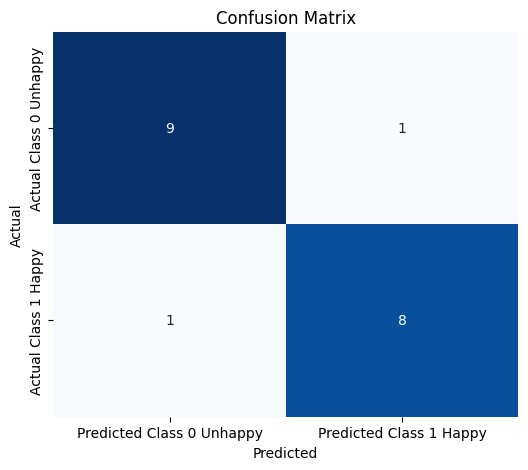

In [60]:
# make a confusion matrix for the best model and feature combination

# Your confusion matrix as a 2D array
conf_matrix = np.array([[9, 1], [1, 8]])

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0 Unhappy', 'Predicted Class 1 Happy'],
            yticklabels=['Actual Class 0 Unhappy', 'Actual Class 1 Happy'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# Conclusion

## Key Findings

The features that emerged as the strongest predictors of customer happiness were:

- **X1**: "My order was delivered on time"
- **X3**: "I ordered everything I wanted to order"
- **X4**: "I paid a good price for my order"
- **X6**: "The app makes ordering easy for me"

These four features were the most significant in predicting customer happiness. **X1** relates to timely delivery, **X3** reflects whether customers could order everything they wanted, **X4** captures perceptions of price fairness, and **X6** assesses ease of use of the ordering app. To refine the model further and gain more customer insights, the following additional questions could be useful:

- **X1**: Add more detailed questions like, “How fast was the delivery?” to capture nuances in the delivery experience.
- **X3**: A more specific survey question could ask whether product unavailability was due to stock issues or other factors, providing deeper insights into the reasons behind incomplete orders.
- **X4**: Further questions could explore customer expectations of price, especially across different types of stores or product categories.
- **X6**: Asking about additional aspects of the app experience, such as customer support or user interface satisfaction, could help understand app-related factors that influence customer happiness.

---

## Challenges with Features

While **X2**: "Contents of my order were as expected" and **X5**: "I am satisfied with my courier" were initially important features, they did not contribute as significantly as **X1**, **X3**, **X4**, and **X6** in the final model. However, customer satisfaction with order contents and couriers remains valuable and could be revisited in future surveys. Similarly, while price perception is relevant, it may be more insightful to explore pricing expectations across various types of stores.

---

## Model Development and Performance

I employed statistical tests (such as bar charts, box plots, and Pearson/Spearman correlations) to identify key features. Additionally, I tested multiple models, including **Logistic Regression**, **Decision Tree Classifier**, **Random Forest Classifier**, and others, alongside feature importance methods like **Permutation Importance** and **Recursive Feature Elimination (RFE)**.

The **ExtraTreesClassifier** outperformed all other models, achieving the best accuracy of **89.47%**. The best feature combination was **['X1', 'X3', 'X4', 'X6']**, which resulted in the following confusion matrix:


This model predicted unhappy customers (class 0) with an accuracy of **90%** and happy customers (class 1) with an accuracy of **89%**, providing a highly accurate and balanced prediction of customer satisfaction.

---

## Recommendations

- **Refine survey questions**: To enhance feature quality and model performance, consider adding more specific questions about delivery speed, order contents, and app experience. This will capture the finer details that distinguish happy from unhappy customers.
- **Monitor class imbalance**: The models performed well in predicting unhappy customers (class 0), which is essential for addressing dissatisfaction. By focusing on converting unhappy customers into happy ones, significant business value can be unlocked.
- **Further testing**: While the **ExtraTreesClassifier** performed excellently, additional classifiers and hyperparameter tuning would be beneficial to further optimize the models.

---

## Final Thoughts

The results from this project provide actionable insights into customer satisfaction and suggest that refining survey questions and model features could lead to even more accurate predictions. These findings can help businesses improve customer experience, optimize resources, and develop strategies to convert unhappy customers into happy ones, driving overall business success.

